In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data_0 = pd.read_excel(r"C:\Users\billi\Downloads\Biogas Dataset\agstar-livestock-ad-database-combined.xlsx")
data_0.head()

,Project Name,Cluster Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),...,Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,System Designer(s)/Developer(s) and Affiliates,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Sheet,Year Shutdown,Reason for Closure
0,Cargill - Sandy River Farm Digester,NaN,Farm Scale,Morrilton,Conway,AR,Covered Lagoon,Operational,2008.0,Swine,...,NaN,Flared Full-time,NaN,Martin Construction Resource LLC (formerly RCM...,NaN,4482.755303,NaN,Operational and Construction,NaN,NaN
1,Butterfield RNG Digester,NaN,Farm Scale,Buckeye,Maricopa,AZ,Mixed Plug Flow,Operational,2022.0,Dairy,...,NaN,Pipeline Gas,NaN,"Avolta [Project Developer]; DVO, Inc. (formerl...",Southwest Gas,14030.128975,Yes,Operational and Construction,NaN,NaN
2,Caballero Dairy Farms Digester,NaN,Farm Scale,Eloy,Pinal,AZ,Unknown or Unspecified,Construction,2022.0,Dairy,...,NaN,Pipeline Gas,NaN,Brightmark [Project Developer],NaN,98999.890159,NaN,Operational and Construction,NaN,NaN
3,Green Gas Partners Stanfield Digester,NaN,Centralized/Regional,Maricopa,Pinal,AZ,Complete Mix,Operational,2018.0,Dairy,...,NaN,Pipeline Gas,NaN,Equilibrium Capital [Project Developer]; Green...,Kinger Morgan El Paso,337499.625540,NaN,Operational and Construction,NaN,NaN
4,Paloma Dairy Digester,NaN,Farm Scale,Gila Bend,Maricopa,AZ,Complete Mix,Operational,2021.0,Dairy,...,NaN,CNG,NaN,Black Bear Environmental Assets [Project Devel...,Southwest Gas Company,100569.493399,NaN,Operational and Construction,NaN,NaN


In [5]:
columns_to_drop = ['Project Name', 'Cluster Name', 'Project Type', 'City', 'County', 'State', 'Status', 'Year Operational', 'Electricity Generated (kWh/yr)', 'Biogas End Use(s)', 'LCFS Pathway?', 'System Designer(s)/Developer(s) and Affiliates', 'Receiving Utility', 'Awarded USDA Funding?', 'Sheet', 'Year Shutdown', 'Reason for Closure']
data_0.drop(columns=columns_to_drop, inplace=True)

In [6]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr)
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,NaN,1814400.0,4482.755303
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,NaN,14030.128975
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,NaN,98999.890159
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,NaN,3454500.0,337499.625540
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,NaN,100569.493399


In [7]:
columns_to_drop = ['Co-Digestion']
data_0.drop(columns=columns_to_drop, inplace=True)
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr)
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,1814400.0,4482.755303
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,14030.128975
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,98999.890159
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,3454500.0,337499.625540
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,100569.493399


In [8]:
data_0['Quantity'] = data_0[['Cattle', 'Dairy', 'Poultry', 'Swine']].sum(axis=1)

In [9]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,1814400.0,4482.755303,4200.0
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,14030.128975,11760.0
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,98999.890159,8800.0
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,3454500.0,337499.625540,30000.0
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,100569.493399,10000.0


In [10]:
data_0.fillna(0, inplace=True)

In [11]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity
0,Covered Lagoon,Swine,0.0,0.0,0.0,4200.0,1814400.0,4482.755303,4200.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,0.0,0.0,0.0,14030.128975,11760.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,0.0,0.0,0.0,98999.890159,8800.0
3,Complete Mix,Dairy,0.0,30000.0,0.0,0.0,3454500.0,337499.625540,30000.0
4,Complete Mix,Dairy,0.0,10000.0,0.0,0.0,0.0,100569.493399,10000.0


In [12]:
data_0['Total waste kg/day']= (data_0['Cattle'] *36.9) +\
                                (data_0['Dairy'] *68) +\
                                (data_0['Poultry'] *0.28)+\
                                 (data_0['Swine'] *5.7)
data_0[['Cattle', 'Dairy', 'Poultry', 'Swine', 'Total waste kg/day']].head()

,Cattle,Dairy,Poultry,Swine,Total waste kg/day
0,0.0,0.0,0.0,4200.0,23940.0
1,0.0,11760.0,0.0,0.0,799680.0
2,0.0,8800.0,0.0,0.0,598400.0
3,0.0,30000.0,0.0,0.0,2040000.0
4,0.0,10000.0,0.0,0.0,680000.0


In [13]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,0.0,0.0,0.0,4200.0,1814400.0,4482.755303,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,0.0,0.0,0.0,14030.128975,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,0.0,0.0,0.0,98999.890159,8800.0,598400.0
3,Complete Mix,Dairy,0.0,30000.0,0.0,0.0,3454500.0,337499.625540,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,0.0,0.0,0.0,100569.493399,10000.0,680000.0


In [14]:
columns_to_drop = ['Total Emission Reductions (MTCO2e/yr)', 'Cattle', 'Dairy', 'Poultry', 'Swine']
data_0.drop(columns=columns_to_drop, inplace=True)
data_0.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,598400.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,680000.0


In [15]:
data_0.isnull().sum()

Digester Type                             0
Animal/Farm Type(s)                       0
Biogas Generation Estimate (cu-ft/day)    0
Quantity                                  0
Total waste kg/day                        0
dtype: int64

In [16]:
data_1 = data_0.dropna()
data_1.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,598400.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,680000.0


In [17]:
data_1 = data_1[data_1['Biogas Generation Estimate (cu-ft/day)'] != 0.0]

In [18]:
data_1.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
9,Covered Lagoon,Dairy,600000.0,15500.0,1054000.0
10,Covered Lagoon,Dairy,50000.0,1700.0,115600.0
11,Covered Lagoon,Dairy,270000.0,9700.0,659600.0


In [19]:
data_1.shape

(232, 5)

In [20]:
columns_to_drop = ['Animal/Farm Type(s)']
data_1.drop(columns=columns_to_drop, inplace=True)

<Axes: xlabel='Digester Type'>

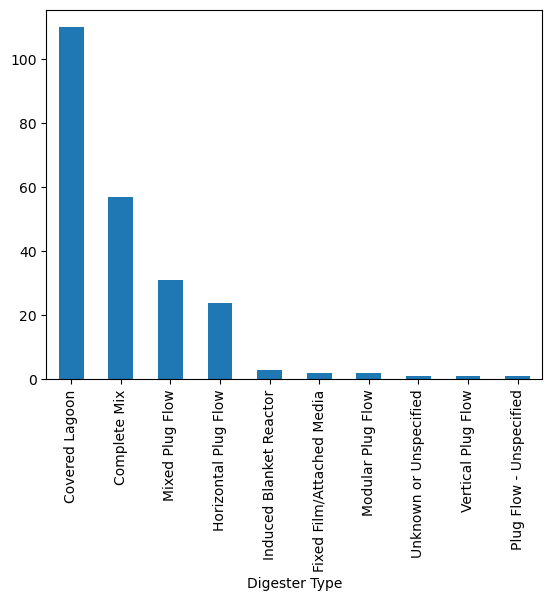

In [21]:
data_1['Digester Type'].value_counts().plot(kind='bar')

In [22]:
# Specify the column name and the list of values to be deleted
column_name = 'Digester Type'
values_to_delete = ['Induced Blanket Reactor', 'Fixed Film/Attached Media', 'Modular Plug Flow', 'Unknown or Unspecified', 'Vertical Plug Flow', 'Plug Flow - Unspecified']

# Filter out the rows
data_1 = data_1[~data_1[column_name].isin(values_to_delete)]

<Axes: xlabel='Digester Type'>

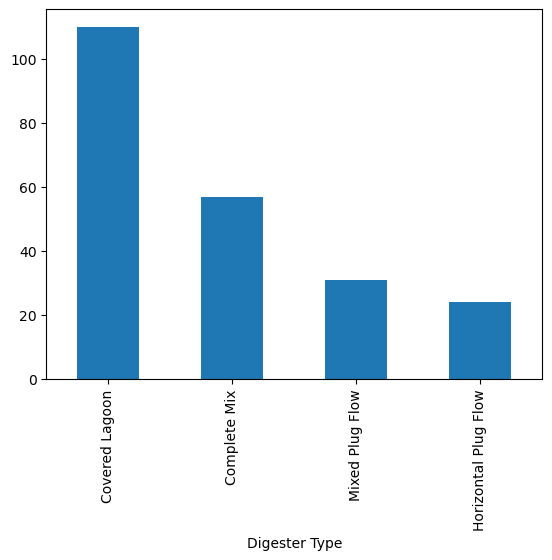

In [23]:
data_1['Digester Type'].value_counts().plot(kind='bar')

In [24]:
#data_1['Animal/Farm Type(s)'].value_counts().plot(kind='bar')

In [25]:
#data_1 = data_1[data_1['Digester Type'] != '4, 2, 6, 8, 9, 7']

In [26]:
#data_1['Digester Type'].value_counts().plot(kind='bar')

# Encoding 

In [28]:
le = preprocessing.LabelEncoder()
Digester_Type = le.fit_transform(data_1['Digester Type'])

In [29]:
#le = preprocessing.LabelEncoder()
#Animal_Type = le.fit_transform(data_1['Animal/Farm Type(s)'])

In [30]:
data_1.iloc[:, 0] = Digester_Type

In [31]:
#data_1.iloc[:, 1] = Animal_Type

In [32]:
data_1.head()

,Digester Type,Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,1,1814400.0,4200.0,23940.0
3,0,3454500.0,30000.0,2040000.0
9,1,600000.0,15500.0,1054000.0
10,1,50000.0,1700.0,115600.0
11,1,270000.0,9700.0,659600.0


# Split Dataset into Training and Test dataset

In [34]:
features_bio = ['Digester Type', 'Total waste kg/day']
x = data_1[features_bio]
y = data_1['Biogas Generation Estimate (cu-ft/day)']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [508]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# Initialize the ANN with an Input layer
model = Sequential()

# Add the Input layer with 3 input features
model.add(Input(shape=(2,)))

# Add the first hidden layer (10 neurons)
model.add(Dense(units=10, activation='relu'))

# Add the second hidden layer (10 neurons)
model.add(Dense(units=10, activation='relu'))

# Add the second hidden layer (10 neurons)
model.add(Dense(units=10, activation='relu'))

# Add the output layer (1 neuron for regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [509]:
'''
# Transform my x data to include polynomial features
# After splitting
poly = PolynomialFeatures(degree=1)

# Transform the training data
x_train_poly = poly.fit_transform(x_train)

# Transform the testing data
x_test_poly = poly.transform(x_test)'''

'\n# Transform my x data to include polynomial features\n# After splitting\npoly = PolynomialFeatures(degree=1)\n\n# Transform the training data\nx_train_poly = poly.fit_transform(x_train)\n\n# Transform the testing data\nx_test_poly = poly.transform(x_test)'

# Model Training

In [511]:
#model_R = LinearRegression()
#model_R.fit(x_train, y_train)
#model_R.fit(x_train_poly, y_train)
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 275723517952.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 379638906880.0000 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323630891008.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 248391811072.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 445369614336.0000 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227624386560.0000
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 400351920128.0000 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227116072960.0000
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 272769105920.0000 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250164150272.0000 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157662887936.0000 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 158593286144.0000
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2199325

In [512]:
#y_pred = model_R.predict(x_test_poly)
#print(y_pred)
# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = model.evaluate(x_test, y_test)
print(f"Mean Squared Error: {mse}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34400591872.0000  
Mean Squared Error: 46446395392.0


In [513]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7297561449810265


In [514]:
test_loss = model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34400591872.0000 
Test loss: 46446395392.0


In [515]:
'''from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")'''

'from sklearn.metrics import mean_absolute_error\nmae = mean_absolute_error(y_test, y_pred)\nprint(f"Mean Absolute Error: {mae}")'

In [516]:
'''from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared Error: {mse}")'''

'from sklearn.metrics import mean_squared_error\nmse = mean_squared_error(y_test, y_pred)\nprint(f"Mean squared Error: {mse}")'

In [517]:
'''rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")'''

'rmse = mse ** 0.5\nprint(f"Root Mean Squared Error: {rmse}")'

In [518]:
'''residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()'''

"residuals = y_test - y_pred\nplt.scatter(y_pred, residuals)\nplt.xlabel('Predicted Values')\nplt.ylabel('Residuals')\nplt.title('Residuals vs Predicted Values')\nplt.show()"